
# Project: Movie Data Review

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb),
including user ratings and revenue. The columns are - id, imdb_id, popularity, budget, revenue, original_title, cast, homepage
director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average
release_year, budget_adj, revenue_adj. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. The data can be found [here](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata). 


### Question(s) for Analysis
- Which genres are most popular from year to year?
- What kind of properties are associated with movies that have high revenues?
- How is popularity trending over time?
- How are revenues trending over time?
- Do top ratings movies always generate big revenue?
- Do higher budget movies always generate big revenue?
- Is there any impact of vote count on revenue?


In [1]:
!pip install seaborn --upgrade   #upgrade seaborn version

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.2)


In [2]:
# import packages and libraries
import seaborn as sns
import matplotlib.pyplot as plt  # visualisations
import pandas as pd          # data claeaning,manipulation and wrangling
import numpy as np           # numeric data
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [3]:
# load our csv data into a dataframe using pandas

df_movie = pd.read_csv('tmdb-movies.csv')
df_movie.head()   #quick overview of first 5 rows

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# display a concise summary of the dataframe,
# including the number of non-null values in each column

df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df_movie.nunique() # number of unique values in each column

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
# Examining the actual number of missing data in each column
# Missing rows in columns like genres, cast, production_companies, director will be dropped

df_movie.isnull().sum()  

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
df_movie.describe()         #statistics for numeric columns, we see some zero data in runtime, revenue, budget field

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning

##### Here are some changes that would be made to the data to ease our analytic process now its been loaded:

- Dropping columns (imdb_id, tagline, keywords, homepage,overview) as they don't intuitively answer our project questions.
- Dropping all null/missing rows (cast, director, genres, and production_companies)
- Remove potential duplicates
- Removing zero values from the numeric columns
- Transform the date column from str to date-time type

In [8]:
# View the index number and label for each column 
for i, v in enumerate(df_movie.columns):
    print(i, v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


In [9]:
# Columns like imdb_id, tagline, keywords, homepage,overview can be removed entirely

df_movie.drop(df_movie.iloc[:, np.r_[1,7,9:11]], inplace=True, axis=1)    #selecting all at a go using a numpy method

In [10]:
df_movie.head(10)        # view to confirm the columns deleted

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


In [11]:
#drop missing rows in cast, director, genres, and production_companies
df_movie.dropna(axis=0, subset=['cast', 'director', 'genres', 'production_companies'], inplace=True)

In [12]:
df_movie.isnull().sum()    #check to see if the rows have been dropped

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [13]:
df_movie.shape   # columns and rows number has decreased

(9773, 17)

In [14]:
# checking possible duplicates to confirm they are true duplicates

df_movie.loc[df_movie.duplicated(keep=False), :] 

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [15]:
# change the 'release_date' column to the proper data type so we can include this in analysing our data
df_movie['release_date'] = pd.to_datetime(df_movie['release_date'])
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 17 columns):
id                      9773 non-null int64
popularity              9773 non-null float64
budget                  9773 non-null int64
revenue                 9773 non-null int64
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
overview                9773 non-null object
runtime                 9773 non-null int64
genres                  9773 non-null object
production_companies    9773 non-null object
release_date            9773 non-null datetime64[ns]
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
budget_adj              9773 non-null float64
revenue_adj             9773 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(6)
memory usage: 1.3+ MB


In [16]:
# drop the duplicate

df_movie.drop_duplicates(inplace=True)

In [17]:
# removing zero values as seen in our statistics preview 
# in the columns like revenue, runtime, budget, budget_adj, revenue_adj

df_movie = df_movie[(df_movie != 0).all(1)]


In [18]:
# quick check to see if the zero values have been removed
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3805.000000,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000,3805.000000,3.805000e+03,3.805000e+03
mean,40040.372668,1.203784,3.760800e+07,1.089734e+08,109.351117,534.159001,6.170565,2001.229172,4.471977e+07,1.387159e+08
std,67585.708616,1.480569,4.232179e+07,1.772976e+08,19.845678,883.757588,0.792437,11.329616,4.488697e+07,2.169973e+08
min,5.000000,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,5925.000000,0.470651,1.000000e+07,1.433379e+07,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.925371e+07
50%,11253.000000,0.810805,2.500000e+07,4.621664e+07,106.000000,209.000000,6.200000,2004.000000,3.038360e+07,6.284688e+07
75%,38579.000000,1.387163,5.000000e+07,1.260695e+08,119.000000,584.000000,6.700000,2010.000000,6.084153e+07,1.658054e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Questions

> Which genres are most popular from year to year?

In [19]:
# The question connects three columns : Genres, Popularity, and release_year
# creating a series with these columns
genre_data = df_movie[['release_year', 'popularity', 'genres']]
genre_data.head(20)


,release_year,popularity,genres
0,2015,32.985763,Action|Adventure|Science Fiction|Thriller
1,2015,28.419936,Action|Adventure|Science Fiction|Thriller
2,2015,13.112507,Adventure|Science Fiction|Thriller
3,2015,11.173104,Action|Adventure|Science Fiction|Fantasy
4,2015,9.335014,Action|Crime|Thriller
5,2015,9.110700,Western|Drama|Adventure|Thriller
6,2015,8.654359,Science Fiction|Action|Thriller|Adventure
7,2015,7.667400,Drama|Adventure|Science Fiction
8,2015,7.404165,Family|Animation|Adventure|Comedy
9,2015,6.326804,Comedy|Animation|Family


#### Got some help to split the row with more than one genre into different rows from [stackoverflow] (https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe)

In [20]:
from itertools import chain

# Return a list from series of '|'-separated strings
def chained(s):
    return list(chain.from_iterable(s.str.split('|')))

# Calculate lengths of each splits
lens = genre_data['genres'].str.split('|').map(len)

# Create a dataframe that repeats or chains
genre_data = pd.DataFrame({'release_year': np.repeat(genre_data['release_year'], lens),                       
                          'genres': chained(genre_data['genres']),
                          'popularity': np.repeat(genre_data['popularity'], lens)})

genre_data.head(20)

,release_year,genres,popularity
0,2015,Action,32.985763
0,2015,Adventure,32.985763
0,2015,Science Fiction,32.985763
0,2015,Thriller,32.985763
1,2015,Action,28.419936
1,2015,Adventure,28.419936
1,2015,Science Fiction,28.419936
1,2015,Thriller,28.419936
2,2015,Adventure,13.112507
2,2015,Science Fiction,13.112507


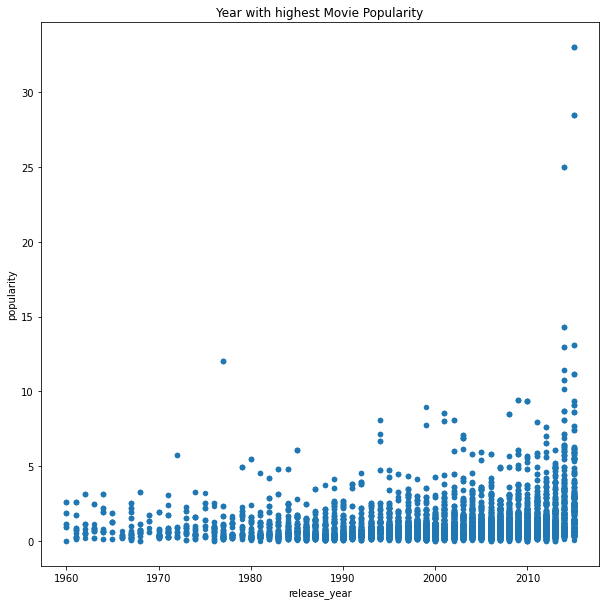

In [21]:
genre_data.plot(y='popularity', x='release_year', kind='scatter', title='Year with highest Movie Popularity', figsize=(10,10));

##### Here we see a trend of movies popularity over different release years:

- Movies with higher popularities (>5) are concentrated between 1995 and 2015 with many more popular ones from 2000 upwards

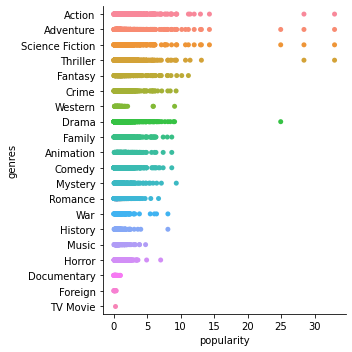

In [22]:
sns.catplot(y="genres", x="popularity", jitter=False, data=genre_data);

##### Plot of Popularity vs Genres of the movies, we observe the top 5 categories between a popularity of 0-10 are:

 - Action
 - Adventure
 - Science Fiction
 - Thriller
 - Fantasy
 
> We also notice that asides Fantasy, all the others in the top 5 have at least one movie within the highest popularity band of 20-30 including Drama genre.

####  Trend of Revenue over the years?

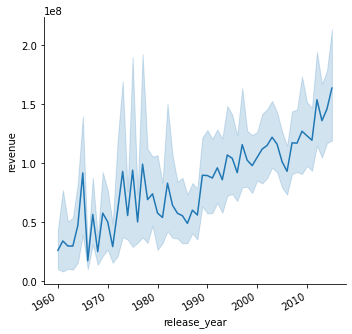

In [23]:
g = sns.relplot(x="release_year", y="revenue", kind="line", data=df_movie);
g.fig.autofmt_xdate()

##### What kinds of properties are associated with movies that have high revenues?


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The colNu

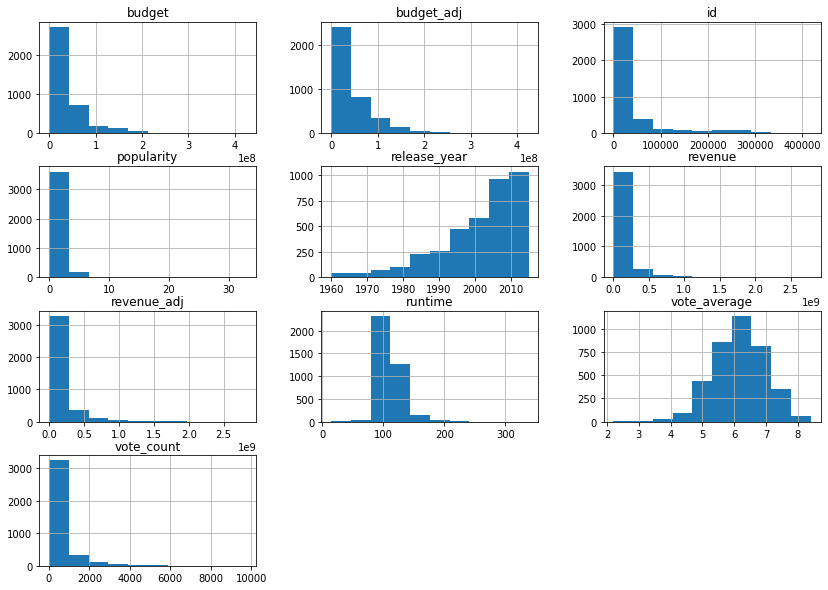

In [24]:
# Quick viz of all numeric columns in the data using the hist function

df_movie.hist(figsize=(14,10));

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The colNu

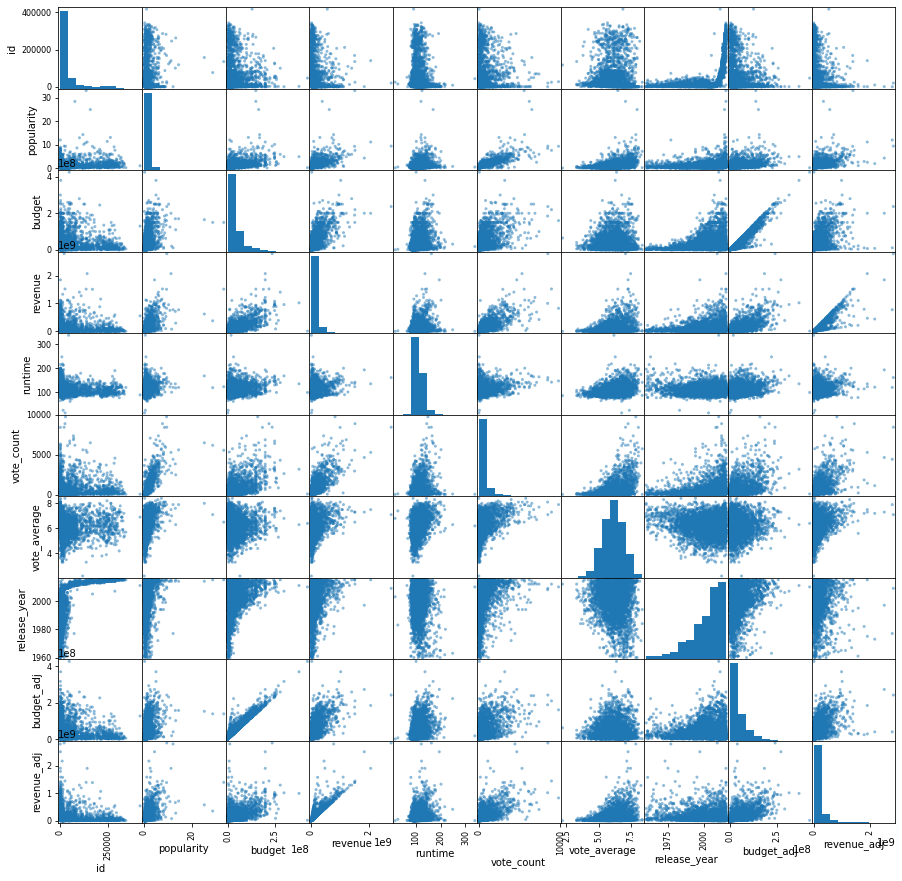

In [25]:
pd.plotting.scatter_matrix(df_movie, figsize=(15,15));       # summarized view to see relationships with high revenue

###### From the scatter matrix results, there's some correlation between revenue and (vote_count, popularity, and budget_adj)

In [26]:
pd.options.display.float_format = '{:.1f}'.format   #change display format from 1e+03 to regular numbers

In [27]:
df_movie.head()

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,33.0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.3,1392445892.5
1,76341,28.4,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939.3,348161292.5
2,262500,13.1,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955.5,271619025.4
3,140607,11.2,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919.0,1902723129.8
4,168259,9.3,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923.1,1385748801.5


In [28]:
# We need a yardstick to group revenues we term as (high revenue)
# checking our statistics of the revenue column

df_movie.revenue_adj.describe()

count         3805.0
mean     138715934.3
std      216997311.4
min              2.4
25%       19253711.0
50%       62846878.3
75%      165805400.3
max     2827123750.4
Name: revenue_adj, dtype: float64

#### Creating revenue_cat column, which is a group of data(bins) by Quantile-based discretization function into equal-sized buckets based on rank or based on sample quantiles [Medium](https://towardsdatascience.com/how-to-bin-numerical-data-with-pandas-fe5146c9dc55)


In [29]:
df_movie['revenue_cat'], cut_bin = pd.qcut(df_movie['revenue_adj'], q=3, labels=['Low', 'Medium', 'High'], retbins = True)
df_movie.head()

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue_cat
0,135397,33.0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.3,1392445892.5,High
1,76341,28.4,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939.3,348161292.5,High
2,262500,13.1,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955.5,271619025.4,High
3,140607,11.2,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919.0,1902723129.8,High
4,168259,9.3,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923.1,1385748801.5,High


In [30]:
df_movie['revenue_cat'].value_counts()   #getting a count of the revenue categories 

Low       1269
High      1268
Medium    1268
Name: revenue_cat, dtype: int64

### From our scatter matrix, three columns are associated with revenue which are: 
 - Budget_adj
 - Popularity
 - Vote_counts
 
###### Running a check to see how they influence 'Low', 'Medium' and 'High' revenue.

In [31]:
# revenue_cat vs budget_adj
df_movie.groupby('revenue_cat').mean().budget_adj

#We see a ratio of 1:3:7 for Low: medium: High revenues

revenue_cat
Low      19413086.8
Medium   36219022.5
High     78547144.5
Name: budget_adj, dtype: float64

In [32]:
# revenue_cat vs popularity

df_movie.groupby('revenue_cat').mean().popularity

# we see a ratio of 1:2:4 for Low: Medium: High revenues

revenue_cat
Low      0.6
Medium   1.0
High     2.0
Name: popularity, dtype: float64

##### Trend of popularity over the years over a revenue category hue which allows see the LEVEL of popularity distribution over the years.
> This trend is logical as very popular movies often get more views, endorsements and in the end high revenue.

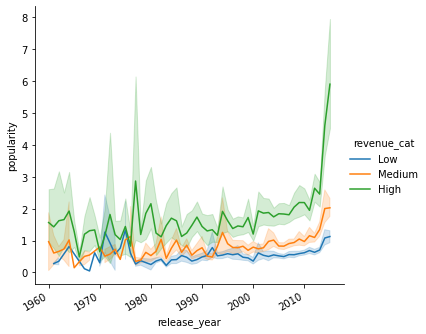

In [33]:
g = sns.relplot(y="popularity", x="release_year", hue='revenue_cat', kind="line", data=df_movie);
g.fig.autofmt_xdate()

In [34]:
# revenue_cat vs vote_counts
df_movie.groupby('revenue_cat').mean().vote_count

# we see am approximate ratio of 1:3:11 for Low: Medium: High revenues

revenue_cat
Low       138.5
Medium    343.1
High     1121.2
Name: vote_count, dtype: float64

##### Trend of vote counts over the years with revenue category as a hue to segment vote count by revenue. 
> We see an increasing high revenue for movies with high vote counts.
This is expected as movies voted higher would capture more viewers attention to view the movies.

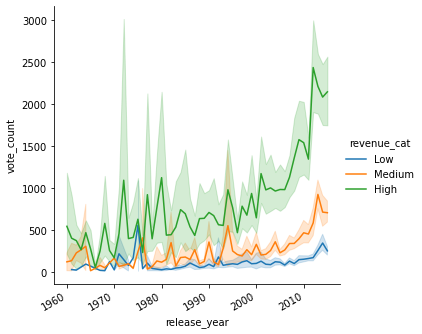

In [35]:
g = sns.relplot(y="vote_count", x="release_year", hue='revenue_cat', kind="line", data=df_movie);
g.fig.autofmt_xdate()

##### How does runtime influence high revenue?
> We see high revenue impacted by runtime from 1960-1970; how ever the trend continued to decline
This might be a changing customer behaviour implying they'd rather get quality movies than lengthier ones.

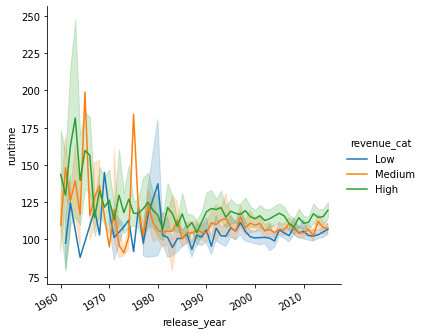

In [36]:
g = sns.relplot(y="runtime", x="release_year", hue='revenue_cat', kind="line", data=df_movie);
g.fig.autofmt_xdate()

###### How does budget impact revenue over the years?

> We observe between 1960 and 1970 - high budget impacted high revenue. 
This trend was flat between 1970-1990 after which it has continued to increase until 2015

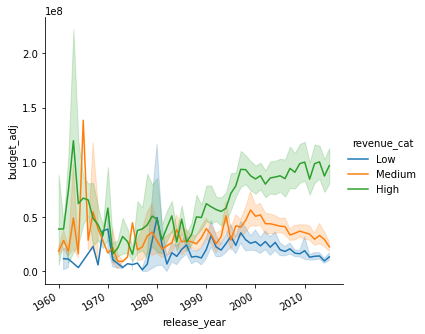

In [37]:
g = sns.relplot(y="budget_adj", x="release_year", hue='revenue_cat', kind="line", data=df_movie);
g.fig.autofmt_xdate()

####  Quick test to confirm our hypothesis and correlation claim by using a column that does not correlate with revenue based on the scatter matrix

In [ ]:
# testing against a parameter with almost no correlation to justify our claim

df_movie.groupby('revenue_cat').mean().runtime

# we see the revenue distribution are almost equal confirming that runtime doesn't influence high revenue

In [ ]:
# check correlation using correlation function in pandas for each pair with revenue_adj

df_movie[['revenue_adj', 'budget_adj']].corr()

##### From our correlation tests, we observe there's a 60% correlation of budget with revenue

In [ ]:
# check correlation using correlation function in pandas for each pair with revenue_adj

df_movie[['revenue_adj', 'popularity']].corr()

##### There's a 50% correlation of revenue with popularity based on our correation test between revenue and movie popularity

In [ ]:
# check correlation using correlation function in pandas for each pair with revenue_adj

df_movie[['revenue_adj', 'vote_count']].corr()

###### Our correlation check shows a 70% correlation of revenue with vote count

<a id='conclusions'></a>
## Conclusions

> Here are some findings from our analysis 

- The year with the highest movie popularity is 2015 with Action, Adventure, Science Fiction, Thriller being the most popular.
- High revenue movies are associated with three variables which are popularity, budget, and vote counts.
- High revenue movies are mostly influenced by vote counts, followed by budget and popularity.

### Limitations

- We have used TMBD Movies dataset for our analysis and worked with popularity, budget, revenue, vote counts, release year and runtime. There's no detail on how popularity and vote counts were obtained for instance. Hence details may or may not be a true representation of other variables they have been compared with.
- There is no exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.
- Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed.


## Submitting your Project 


In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0